In [1]:
!pip install pybind11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 5.2 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!g++ -O3 -Wall -shared -std=c++11 -fPIC `python3 -m pybind11 --includes` /kaggle/input/rubikpermutationslib/permutations.cpp -o permutations`python3-config --extension-suffix`

/kaggle/input/rubikpermutationslib/permutations.cpp: In function ‘void apply_permutations(std::vector<std::vector<int> >&, std::vector<std::vector<int> >&, int, int)’:
/kaggle/input/rubikpermutationslib/permutations.cpp:36:34: warning: comparison of integer expressions of different signedness: ‘size_t’ {aka ‘long unsigned int’} and ‘int’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wsign-compare-Wsign-compare]8;;]
   36 |         for (size_t i = start; i < end; ++i) {
      |                                ~~^~~~~


In [3]:
import pandas as pd
import json
import numpy as np
puzzle_info = pd.read_csv("/kaggle/input/santa-2023/puzzle_info.csv")
rubik_moves = puzzle_info['allowed_moves'][1]
rubik_moves = json.loads(rubik_moves.replace("'", "\""))
#list(rubik_moves.keys())
rubik_moves = list(rubik_moves.values())

In [4]:
#permutation_list = np.array([[0, 5, 4, 2, 3, 1],[1, 2, 3, 4, 0, 5]], dtype=np.int32)
permutation_list = np.array(rubik_moves, dtype=np.int32)
def find_inverse(permutation):
    inverse = np.zeros_like(permutation)
    for i, p in enumerate(permutation):
        inverse[p] = i
    return inverse

# Find the inverses for each row and append them at the end
inverses = np.apply_along_axis(find_inverse, axis=1, arr=permutation_list)
permutation_list = np.concatenate((permutation_list, inverses), axis=0)

In [5]:
import numpy as np
import random
import permutations





# Call the C++ function on each row of the matrix



#print(matrix)


In [6]:
def generatePerms(size,depth):
    # Create a sample matrix and a list of permutations
    num_rows = size
    num_cols = 54


    repeated_values = np.repeat(np.arange(6), 9)  # Repeat 0-5 nine times
    temp_matrix = np.tile(repeated_values, (num_rows, 1))
    temp_matrix = np.concatenate((temp_matrix, np.full((num_rows, 1), -1)), axis=1)
    
    for i in range(0,depth):
        temp_matrix=permutations.apply_permutations(temp_matrix, permutation_list,4)
    
    temp_last_column = temp_matrix[:, -1]
    temp_matrix_without_last_column = np.delete(temp_matrix, -1, axis=1)

    return temp_matrix_without_last_column,temp_last_column

In [7]:
def gen_batch(num_rows=100000):
    
    matrix, lastperm = generatePerms(num_rows,1)
    for depth in range(2,21):
        matrix_new, lastperm_new = generatePerms(num_rows,depth)
        print(matrix_new[0])
        matrix=np.concatenate((matrix, matrix_new), axis=0)
        lastperm=np.concatenate((lastperm, lastperm_new), axis=0)
            # 1D array
    y_train = np.array(lastperm)
    x_train = np.array(matrix)
    permutation = np.random.permutation(len(y_train))
    y_train = y_train[permutation]
    x_train = x_train[permutation, :]
    return x_train,y_train

In [8]:


import tensorflow as tf
# Configure Strategy. Assume TPU...if not set default for GPU
tpu = None
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver("local")
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("REPLICAS: ", strategy.num_replicas_in_sync)



INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2024-01-22 23:12:01.772670: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-22 23:12:01.772774: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-22 23:12:01.772855: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-22 23:12:01.772932: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-22 23:12:01.772992: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-22 23:12:01.773173: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-22 23:12:01.773260: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


In [11]:
def LinearBlock(inputs,size):
    x=tf.keras.layers.Dense(size,activation="relu")(inputs)
    x=tf.keras.layers.BatchNormalization()(x)
    return x

def ResidualBlock(inputs,embed_dim):
    x=inputs
    x=LinearBlock(x,embed_dim)
    x=LinearBlock(x,embed_dim)
    x+=inputs
    return x

#def scce_with_ls(y, y_hat):
    #y = tf.squeeze(tf.one_hot(y, 18), axis=1)
    #return tf.keras.losses.categorical_crossentropy(y, y_hat, label_smoothing = 0.02)
class MaskedAverage(tf.keras.layers.Layer):
    def __init__(self, num_branches=25, num_selected=15, **kwargs):
        super(MaskedAverage, self).__init__(**kwargs)
        self.num_branches = num_branches
        self.num_selected = num_selected

    def call(self, inputs, training=None):
        if training:
            # Create a random mask for training
            mask = tf.random.shuffle(tf.range(self.num_branches))[:self.num_selected]
            branches_selected = tf.gather(inputs, mask)
            avg = tf.reduce_mean(branches_selected, axis=0)
        else:
            # Use all branches for validation/inference
            avg = tf.reduce_mean(inputs, axis=0)
        return avg
    
def createModel():
    with strategy.scope():
        
        inputs = tf.keras.Input(shape=(54),dtype=tf.int8)
        
        x=tf.one_hot(inputs, depth=6, dtype=tf.bfloat16)
        
        x = tf.keras.layers.Flatten()(x)
        
        #x=LinearBlock(x,5000)
        #x = tf.keras.layers.Dropout(0.1)(x)
        #x=LinearBlock(x,1000)
        #x = tf.keras.layers.Dropout(0.1)(x)
        #x=ResidualBlock(x,1000)
        #x = tf.keras.layers.Dropout(0.1)(x)
        #x=ResidualBlock(x,1000)
        #x = tf.keras.layers.Dropout(0.1)(x)
        #x=ResidualBlock(x,1000)
        #x = tf.keras.layers.Dropout(0.1)(x)
        #x=ResidualBlock(x,1000)
        #x = tf.keras.layers.Dropout(0.1)(x)
        #outputs=tf.keras.layers.Dense(18,activation='softmax')(x)
        #x=ResidualBlock(x,324)
        #x = tf.keras.layers.Dropout(0.1)(x)
        branches = []
        for i in range(25):
            branch = tf.keras.layers.Dense(200, activation='relu')(x)
            branch = tf.keras.layers.Dense(200, activation='relu')(branch) 
            branch = tf.keras.layers.Dense(200, activation='relu')(branch)
            #branch=ResidualBlock(x,324)
            #branch = tf.keras.layers.Dropout(0.1)(branch)
            #branch=ResidualBlock(branch,324)
            
            branch = tf.keras.layers.Dense(500, activation='linear')(branch)
            branches.append(branch)

        #concat = tf.keras.layers.Concatenate()(branches)
        #avg = tf.keras.layers.Average()(branches)
        avg = MaskedAverage()(branches)
        #x=tf.keras.layers.Dense(500,activation="softmax")(concat)
        x=tf.keras.layers.Dense(500,activation="sigmoid")(avg)
        x=tf.keras.layers.Dense(18,activation="sigmoid")(x)
        outputs=tf.keras.layers.Dense(18,activation="softmax")(x)
        
        
        model = tf.keras.Model(inputs=inputs, outputs=outputs)
        
        
        model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                      metrics=['sparse_categorical_accuracy'])
        #model.compile(loss=scce_with_ls,
        #              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        #              metrics=['sparse_categorical_accuracy'])
        model.summary()
        return model
tf.keras.backend.clear_session()
model=createModel()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 54)]                 0         []                            
                                                                                                  
 tf.one_hot (TFOpLambda)     (None, 54, 6)                0         ['input_1[0][0]']             
                                                                                                  
 flatten (Flatten)           (None, 324)                  0         ['tf.one_hot[0][0]']          
                                                                                                  
 dense (Dense)               (None, 200)                  65000     ['flatten[0][0]']             
                                                                                              

In [ ]:
for epoch in range(0,100):
    x_train,y_train=gen_batch()
    model.fit(x_train,y_train,batch_size=4096)

[4 4 1 0 0 1 0 0 1 1 1 5 1 1 5 1 1 2 2 2 2 2 2 2 0 0 0 0 3 3 0 3 3 4 3 3 5
 4 4 5 4 4 5 4 4 5 5 3 5 5 3 2 2 3]
[0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 1 1 1 3 3 3 2 2 2 2 2 2 4 4 4 3 3 3 3 3 3 1
 1 1 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5]
[0 3 4 1 3 0 1 0 0 5 4 1 5 0 1 4 0 1 2 2 1 2 2 2 2 2 2 0 5 2 3 5 3 3 5 3 3
 4 4 4 4 4 4 0 0 3 1 5 3 1 5 5 1 5]
[0 0 3 0 0 3 0 1 3 1 5 0 1 1 0 1 5 0 2 2 2 2 2 2 2 1 2 5 3 3 5 3 3 5 2 3 4
 4 4 4 4 0 4 4 4 5 3 1 5 5 4 5 1 1]
[2 2 1 4 4 4 0 1 0 1 5 1 1 5 1 4 5 4 2 0 5 2 1 2 1 5 5 2 3 3 0 0 0 2 3 3 0
 5 4 1 3 4 0 0 3 5 2 5 3 2 3 4 4 3]
[0 0 0 1 3 3 3 1 3 4 2 4 0 5 3 3 5 5 0 5 1 4 4 4 4 2 4 2 2 2 1 0 5 0 0 1 3
 0 5 4 2 4 2 2 2 5 1 1 5 1 3 5 3 1]
[4 4 0 1 1 0 0 2 0 4 0 4 0 0 4 5 3 4 1 1 1 1 4 4 1 2 0 2 3 3 5 5 5 3 4 2 5
 2 3 1 2 3 5 3 3 2 5 5 2 3 5 1 0 2]
[5 2 5 0 0 0 3 2 4 2 1 1 5 2 0 2 1 3 0 2 1 3 3 4 5 1 4 4 5 4 3 4 3 3 5 1 3
 4 0 2 1 3 2 1 0 1 4 2 5 5 0 5 4 0]
[2 0 2 0 1 3 0 2 3 1 5 0 1 2 0 1 3 0 2 2 1 2 0 5 2 2 5 5 1 5 3 4 3 3 1 3 3
 4 4 0 5 4 0 4 4 5 4 1 5 3 1 4 5 4]
[

2024-01-22 23:19:06.928061: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


489/489 [==============================] - 74s 80ms/step - loss: 2.4311 - sparse_categorical_accuracy: 0.2857
[1 0 0 1 0 0 1 0 0 5 1 1 2 2 2 5 1 1 2 2 2 3 3 0 2 2 2 3 3 0 4 4 4 3 3 0 4
 4 4 5 1 1 4 4 4 3 5 5 3 5 5 3 5 5]
[0 1 0 0 1 0 5 3 5 1 5 1 1 5 1 1 5 1 4 2 2 4 2 2 4 2 2 3 0 3 3 0 3 3 0 3 4
 4 2 4 4 2 4 4 2 0 1 0 5 3 5 5 3 5]
[1 4 4 1 0 3 1 4 3 2 1 0 5 1 0 0 1 4 2 2 0 2 2 0 0 0 3 3 3 4 3 3 0 5 5 4 5
 5 5 4 4 4 5 5 1 2 2 1 3 5 1 3 2 2]
[4 4 4 0 1 0 2 2 2 1 1 1 5 5 5 1 1 1 5 2 0 3 2 1 5 2 0 3 3 3 0 0 0 3 3 3 5
 4 0 3 4 1 5 4 0 4 4 4 5 3 5 2 2 2]
[0 0 1 2 2 1 2 1 1 1 4 4 1 0 4 1 4 5 5 5 5 5 1 5 2 1 2 2 3 3 2 5 2 0 3 3 4
 0 0 3 3 0 4 0 0 4 3 3 4 4 2 5 5 3]
[0 0 5 0 0 5 1 5 3 0 2 4 3 1 4 0 3 1 0 4 4 0 2 0 5 1 2 3 2 2 1 3 3 5 1 5 3
 3 2 4 4 5 2 1 4 1 2 4 2 5 4 3 5 1]
[0 0 1 4 4 5 1 2 5 4 1 4 3 3 3 4 1 2 3 3 5 4 5 1 1 0 5 2 2 2 0 1 4 2 5 4 3
 5 0 0 0 2 1 1 0 3 4 0 5 2 3 5 2 3]
[0 3 0 0 3 0 4 1 1 3 4 4 2 2 2 5 0 1 5 4 4 3 5 3 2 2 2 1 0 1 5 4 4 3 5 0 2
 2 0 5 0 1 3 4 4 3 1 5 3 1 5 2 1 5]
[2

In [13]:
model.save("rubik2_base.keras")

In [14]:
def gen_batch_sorted(num_rows=1000):
    
    matrix, lastperm = generatePerms(num_rows,1)
    for depth in range(2,21):
        matrix_new, lastperm_new = generatePerms(num_rows,depth)
        print(matrix_new[0])
        matrix=np.concatenate((matrix, matrix_new), axis=0)
        lastperm=np.concatenate((lastperm, lastperm_new), axis=0)
            # 1D array
    y_train = np.array(lastperm)
    x_train = np.array(matrix)
    return x_train,y_train

In [15]:
x_test,y_test=gen_batch_sorted()

[0 0 5 0 0 5 0 0 5 1 1 3 1 1 3 1 1 3 2 2 2 2 2 2 2 2 2 1 3 3 1 3 3 1 3 3 4
 4 4 4 4 4 4 4 4 5 5 0 5 5 0 5 5 0]
[0 1 0 0 1 0 2 2 2 1 1 1 5 5 5 4 4 0 5 2 2 3 2 2 1 1 1 3 0 3 3 0 3 5 2 2 4
 4 0 4 4 1 3 0 3 5 5 4 3 3 4 5 5 4]
[2 2 1 4 4 4 2 2 5 5 5 4 1 1 1 1 1 1 3 0 2 5 0 2 5 1 5 0 3 3 0 3 3 2 3 3 0
 5 1 0 5 0 0 3 0 4 4 4 5 2 2 4 4 3]
[1 0 5 2 4 2 1 0 5 5 1 3 2 0 4 5 1 3 2 0 2 3 3 3 2 0 2 1 3 0 2 5 4 1 3 0 4
 1 4 5 1 5 4 1 4 3 5 0 4 2 4 3 5 0]
[0 3 2 3 3 1 0 4 1 2 0 5 1 2 4 1 0 5 2 2 3 5 5 5 2 2 3 0 5 4 2 4 3 0 5 3 1
 0 1 4 0 4 4 0 4 5 2 3 1 1 3 5 1 4]
[0 0 0 4 4 3 4 4 3 1 1 2 1 1 4 1 1 4 5 5 2 0 0 2 0 0 3 3 3 3 3 3 3 4 2 2 4
 5 5 4 5 5 1 5 5 2 2 1 2 2 1 0 0 5]
[3 4 0 2 2 0 0 0 0 1 1 2 1 1 2 4 4 1 3 3 3 3 5 1 2 5 1 4 3 2 5 3 2 5 2 2 5
 1 4 5 0 4 1 0 3 5 5 5 4 4 3 0 0 4]
[1 1 4 0 4 0 0 5 0 1 4 1 0 0 1 3 3 0 2 2 0 2 3 2 3 4 4 3 4 4 3 5 5 5 1 1 5
 4 4 2 1 1 2 3 2 5 5 2 0 2 3 5 5 3]
[4 2 0 3 0 1 4 5 3 3 1 2 3 3 1 3 4 0 5 2 1 0 4 2 3 1 4 2 0 1 5 1 2 1 0 1 0
 0 0 3 2 5 2 5 5 4 3 2 4 5 4 5 4 5]
[

In [16]:
y_pred=model.predict(x_test)

2024-01-23 00:28:24.189753: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


625/625 [==============================] - 7s 8ms/step


In [ ]:

print(x_test.shape)
print(y_test.shape)
print(y_pred.shape)

In [17]:
model.evaluate(x_test,y_test)

625/625 [==============================] - 8s 9ms/step - loss: 1.6214 - sparse_categorical_accuracy: 0.5156


[1.621413230895996, 0.5155500173568726]

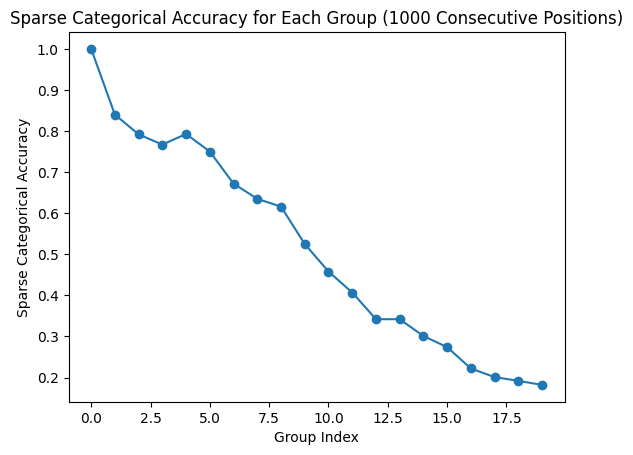

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import sparse_categorical_accuracy
# Function to calculate sparse categorical accuracy for each group
def calculate_group_accuracy(y_true, y_pred, group_size=1000):
    num_groups = len(y_true) // group_size
    accuracies = []

    for i in range(num_groups):
        start_idx = i * group_size
        end_idx = (i + 1) * group_size

        group_true = y_true[start_idx:end_idx]
        group_pred = y_pred[start_idx:end_idx]
        
        accuracy = np.mean(sparse_categorical_accuracy(group_true, group_pred))
        accuracies.append(accuracy)

    return np.array(accuracies)

# Calculate sparse categorical accuracy for each group
group_size = 1000
accuracies = calculate_group_accuracy(y_test, y_pred, group_size)

# Plot the scores
plt.plot(accuracies, marker='o')
plt.xlabel('Group Index')
plt.ylabel('Sparse Categorical Accuracy')
plt.title(f'Sparse Categorical Accuracy for Each Group ({group_size} Consecutive Positions)')
plt.show()